In [51]:
import pandas as pd
import numpy
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Tarea 1
Descargar el archivo GCB2022v27_MtCO2_flat.csv de kaggle

In [6]:
#Archivo GCB2022v27_MtCO2_flat.csv

#Leer el archivo CSV y lo imprimimos
df = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


* Explorar el dataset

  * desplegar nombres de columnas 
  * tipo de datos 
  * distribucion de NaNs


In [71]:
#Desplegamos la columna de nombres 
Columnas = df.columns.values.tolist()
print('Nombres por columna: \n', Columnas, "\n")

#Imprimimos los  tipos de datos
tipos_datos = df.dtypes 
print("Tipos de datos de cada fila\n", tipos_datos, "\n")

#Distribucion de NaNs
df.isna().sum()

Nombres por columna: 
 ['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita'] 

Tipos de datos de cada fila
 Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object 



Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

* ¿De cuántos países diferentes hay datos?

In [13]:
#Guardamos todos los datos de la columna country
Conuntries = df['Country']
#Guardamos los paises en total que aprecen en el archvvio 
N_paises = len(Conuntries.unique())

# Imprimir los valores únicos de la fila
print("En el documento se encuentra", N_paises, "paises")

En el documento se encuentra 232 paises


* Graficar los valores globales y los de Mexico para: 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'.

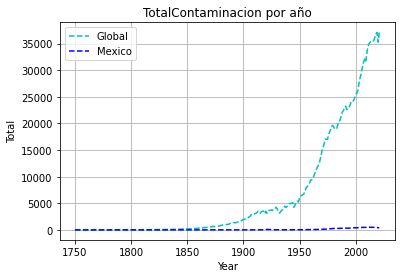

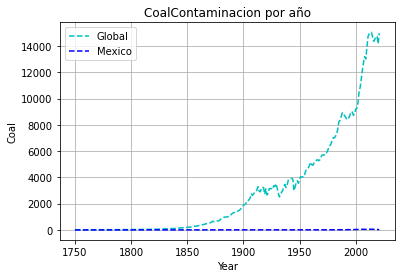

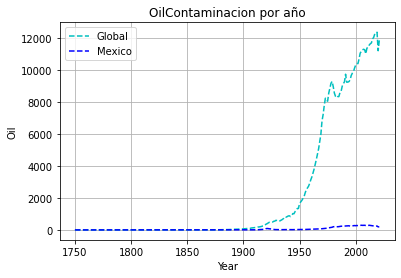

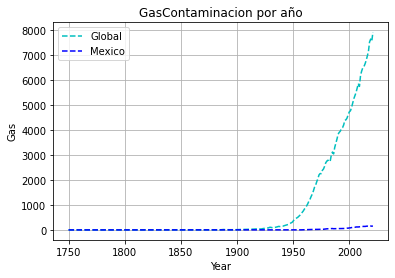

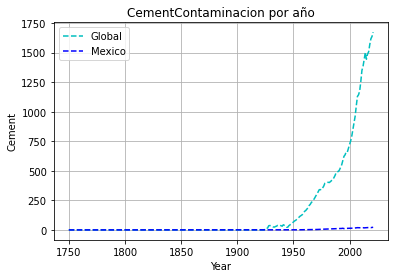

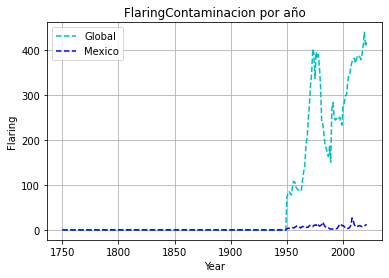

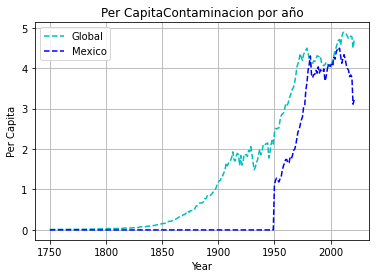

In [68]:
from matplotlib.rcsetup import Colormap
#Guardamos los datos globales y los datos de mexxico 
DatosG = df[df['Country'] == 'Global']
DatosM = df[df['Country'] == 'Mexico']

#Seleccionamos las columnas de los datos que vamos a ocupar

Columnas_Grafica= ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

#Generaamos un ciclo para uqe se grafique laa informacion de cada columna
for index, Columnas in enumerate(Columnas_Grafica):
  fig, ax = plt.subplots()
  DatosG.plot(x = 'Year', y = Columnas, linestyle="--", color="c", ax = ax, label = 'Global', title = Columnas + 'Contaminacion por año', grid = True, ylabel = Columnas, xlabel = 'Year')
  DatosM.plot(x = 'Year', y = Columnas, linestyle="--", color="b", ax = ax, label = 'Mexico', title = Columnas + 'Contaminacion por año', grid = True, ylabel = Columnas, xlabel = 'Year')


* Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior.
  * Cuales son los 3 países que más contaminan en cada uno de los casos?
  * Considerando solo la emisión de los paises del G20, con que porcentaje contribuye México al Total y Per Capita?



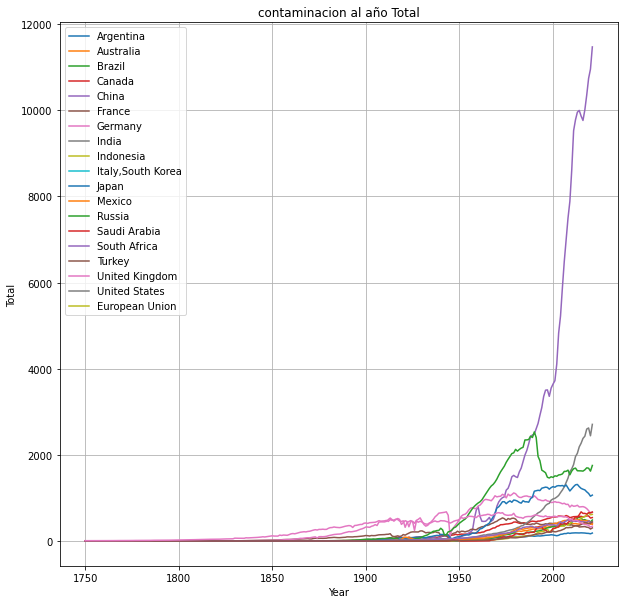

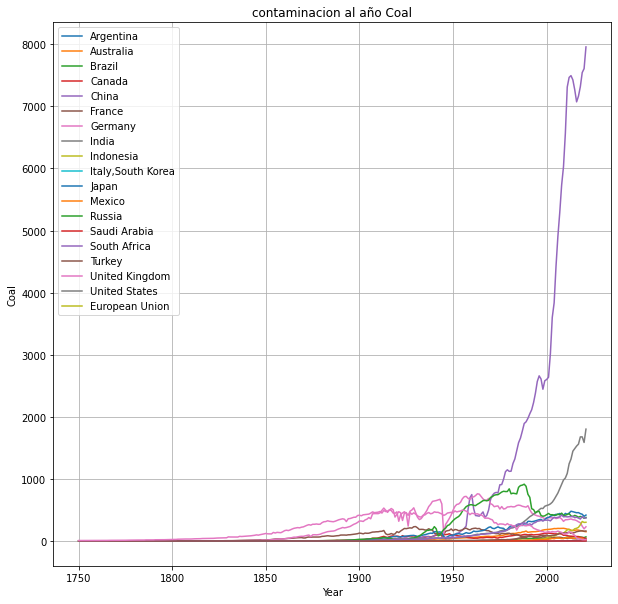

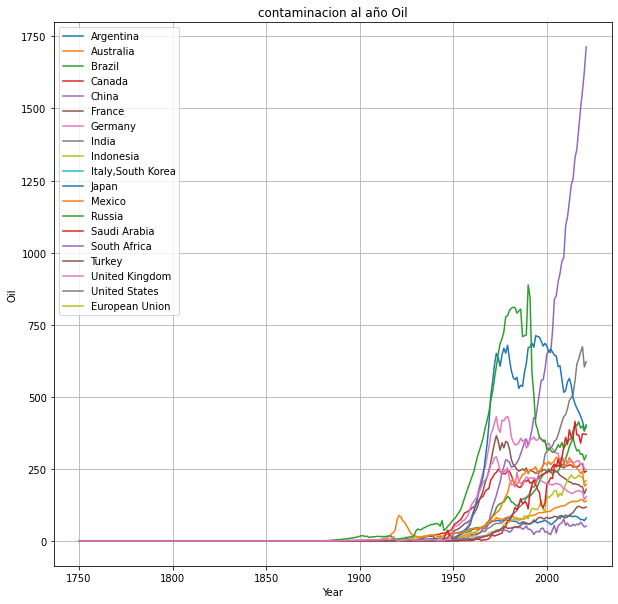

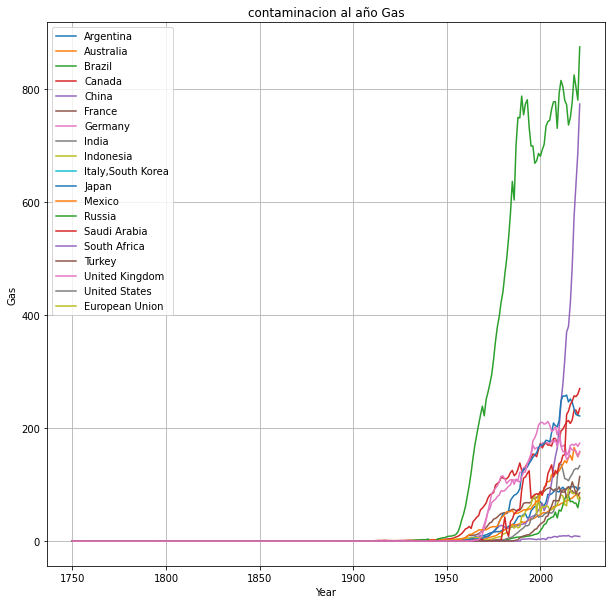

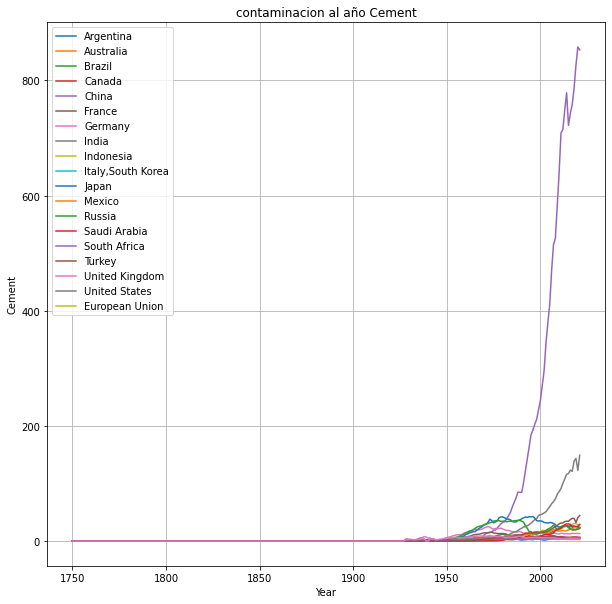

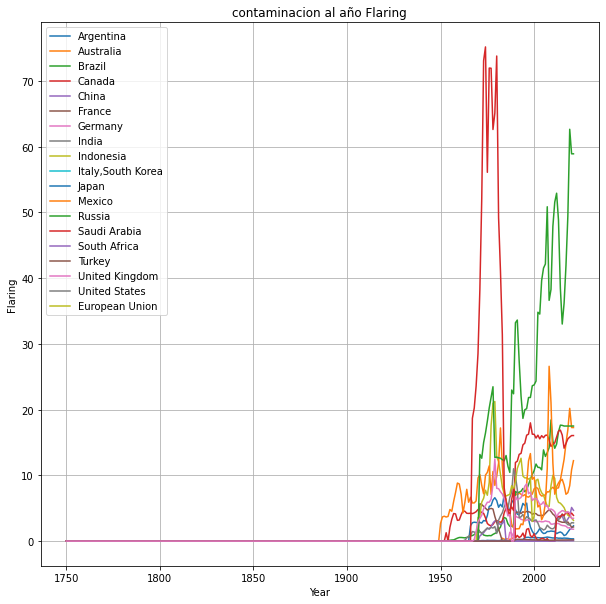

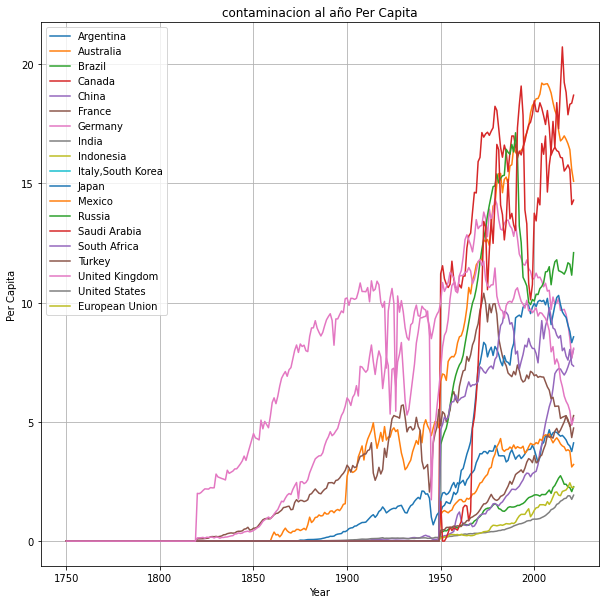

In [63]:
#Extraemos los paises
Lista_Paises = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy,' 'South Korea', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'European Union']
Datos_Paises = {}
for country in Lista_Paises:
  Datos_Paises.update({country : df[df['Country'] == country]})

#Se seleccionan las columnas de las que se desea obtener una gráfica
Columnas_Grafica = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']


#Generamos un ciclo para poder graficar los  datos
for index, column in enumerate(Columnas_Grafica):
    fig, ax = plt.subplots(figsize = (10,10))
    for country in Lista_Paises:
        Datos_Paises[country].plot(x = 'Year', y = column, ax = ax, label = country, title = 'contaminacion al año ' + column, grid = True, ylabel = column, xlabel = 'Year')


In [107]:
#Generamos un dataframe con todos los datos de los paises
Lista_DatosP = list(Datos_Paises.values())
G20_df = pd.concat(Lista_DatosP, axis = 0)
G20_df = G20_df.reset_index()
G20_df = G20_df.drop(labels = ['index', 'Year', 'Other'], axis = 1)

#Agrupación por país. Se calcula la suma de cada columna y posteriormente se obtienen los 3 pases con el
#mayor valor en cada categoría.
ContaminacionT_df = G20_df.groupby('Country').sum()
AnalisisC = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
Top_3 = {}
for column in AnalisisC:
    Top_3.update({column : ContaminacionT_df.reset_index().nlargest(3, column)['Country'].tolist()})
print("Los 3 paises que contaminan mas en cada una de las categorias son:\n", top_countries, "\n")

#¿Con qué porcentaje contribuye México al Total y Per Capita?

#Análisis por columna del total de México y la suma de todos los países del G20
Analisis_C = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
ComparaacionM = {}
for columna in AnalisisC:
    SumaM = ContaminacionT_df.loc['Mexico', columna]
    SumaG = ContaminacionT_df[columna].sum()
    PorcentajeM = mexico_sum / global_sum * 100
    mexico_comparative.update({columna : PorcentajeM})
    print(f"Mexico representa {mexico_comparative[columna]:.2f}% del valor total de {columna}")
  

Los 3 paises que contaminan mas en cada una de las categorias son:
 {'Total': ['China', 'Russia', 'Germany'], 'Coal': ['China', 'Germany', 'United Kingdom'], 'Oil': ['China', 'Russia', 'Japan'], 'Gas': ['Russia', 'Canada', 'United Kingdom'], 'Cement': ['China', 'India', 'Japan'], 'Flaring': ['Russia', 'Saudi Arabia', 'Canada'], 'Per Capita': ['United Kingdom', 'Germany', 'Australia']} 

Mexico representa 2.30% del valor total de Total
Mexico representa 2.30% del valor total de Coal
Mexico representa 2.30% del valor total de Oil
Mexico representa 2.30% del valor total de Gas
Mexico representa 2.30% del valor total de Cement
Mexico representa 2.30% del valor total de Flaring
Mexico representa 2.30% del valor total de Per Capita


* Eliminar NaNs.



In [60]:
#Eliminamos los  NaN's
df = df.fillna(0)
print(f'\nDespués de la limpieza de NaNs el DataFrame contiene : \n{df.isna().sum()} NaNs')


Después de la limpieza de NaNs el DataFrame contiene : 
Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64 NaNs
